# ECON 407: Problem Set 3
<b>Professor Peifan Wu</b>

<b>Jack (Quan Cheng) Xie</b> <br>
Student #: 31091325

October 25, 2020

---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
 
import pandas as pd

## Q1: Comparative Statics of the Basic McCall Model

For this question, we consider the plain-vanilla McCall Model that we covered in class:

- Time period is discrete, and the economic agents live forever.
- An unemployed agent receives in each period a job offer at wage $w$. The wage is a function of some underlying state $s$, i.e., $w(s)$.
- Assume there are $n$ states. $s$ is i.i.d. over time, with $q(s)$ being the probability mass function over the states.
- The unemployed agent observes the state $s$ at the beginning of each time period. She can choose whether to accept the wage offer or reject it.
    - If she accepts the offer, she will receive the same amount forever.
    - If she rejects the offer, she will receive an unemployment benefit $c$ in this period.
- The economic agents, either unemployed or employed, discount future earnings with a discount rate $\beta$.

As we discussed in previous classes, the value function of a currently unemployed agent, $v(s)$, is the solution to the following Bellman equation,

$$
V\left(s\right)=\max\left\{ \frac{w\left(s\right)}{1-\beta},c+\beta\sum_{s'\in\mathbb{S}}V\left(s'\right)q\left(s'\right)\right\}
$$

For the default parameter values and settings we use the same ones covered in the previous classes.

In [3]:
# Preparations and parameterization
n, a, b = 51, 200, 100                        # default parameters
q_default = stats.betabinom(n, a, b).pmf      # probability mass function

w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n)
q_grid = q_default(w_default)

c = 25       # Unemployment benefit
beta = 0.99  # Discount factor

In [3]:
# bold string
textbf = lambda x: '\033[1m'+str(x)+'\033[0m'

# default params for plot
line_params = dict(lw=6, alpha=0.5)
font_params = dict(fontsize=16)

### Q1.1 (A free lunch for you all) Solve the benchmark model

Solve $V(s)$ and plot it. (Note: you only need to plot the converged solution). Describe the optimal policy function in your own words: when will an unemployed agent choose to receive the offer, and when she will reject it?

In [4]:
# Q1 setup

def basic_McCall(
            c = 25,       # Unemployment benefit
            beta = 0.99  # Discount factor
):
    '''
    Solves basic McCall model given parameters c and beta.
    
    Returns results when solution converges.
    '''


    # initialize array for value function as list
    # list are easier to append for unknown number of iterations
    v = [np.zeros(n)]

    # accept wage / perpetuity value
    w = w_default / (1 - beta)

    # counter
    t = 0

    # iterate until convergence
    while True:

        # continuation value
        cont = c + beta * np.dot(v[-1], q_grid)

        # policy function
        is_accept = w > cont

        # update value
        v.append(w * (is_accept==True) + cont * (is_accept==False))

        # update iteration counter
        t+=1
        
        # break if converged
        if all(v[-1] == v[-2]):

            # compute reservation wage
            rw = (1 - beta)*cont
            
            # return dictionary for convergence results
            return {
                'V(s)' : v[-1], # return only last set of value
                'V_accept (perpetuity)' : w, # accept value
                'V_reject (continuation)' : cont, # reject value
                'Policy (accept)' : is_accept, # policy function
                't' : t, # iteration counter
                'rw' : rw # reservation wage
            }
        

Convergence at 266 periods
Reservation Wage: 38.8124


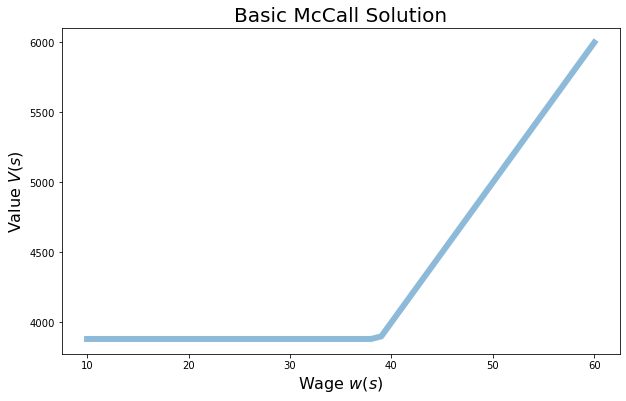

,V(s),V_accept (perpetuity),V_reject (continuation),Policy (accept)
w(s),,,,
10.0,3881.24,1000.0,3881.24,False
11.0,3881.24,1100.0,3881.24,False
12.0,3881.24,1200.0,3881.24,False
13.0,3881.24,1300.0,3881.24,False
14.0,3881.24,1400.0,3881.24,False
15.0,3881.24,1500.0,3881.24,False
16.0,3881.24,1600.0,3881.24,False
17.0,3881.24,1700.0,3881.24,False
18.0,3881.24,1800.0,3881.24,False


In [5]:
#Q1.1 solution

res = basic_McCall()

t = res.pop('t')
rw = res.pop('rw')

# print number of iterations to converge
print(f'Convergence at {textbf(t)} periods')

# print reservation wage
print('Reservation Wage:', textbf(round(rw, 4)))

plt.figure(figsize=(10, 6))

# plot value function
plt.plot(w_default, res['V(s)'], **line_params)

# labels
plt.xlabel('Wage $w(s)$', **font_params)
plt.ylabel('Value $V(s)$', **font_params)
plt.title(f'Basic McCall Solution', fontsize=20)

plt.show()

# show convergence results as dataframe
df = pd.DataFrame(res, index=w_default)
df.index.name = 'w(s)'

display(
    df.round(2)
)

### Optimal Policy Function

At any period, the unemployed agent will `accept` the wage if it's **`39 or more`**, and `reject` the wage if it's **`38 or less`**.

---

### Q1.2 Comparative Statics on the Reservation Wage

The indifference point that the economic agent choose to accept or to reject the offer is called the **reservation wage**.

Create a grid with 100 evenly spaced elements for beta that varies between 0.9 and 0.99. Solve the model holding all the other parameters the same, and plot the reservation wage as a function of beta (i.e., with beta on the horizontal axis and reservation wage on the vertical axis). What do you find? Can you explain it with economic intuition?

Now, hold beta and other parameters the same as before, but create a grid with 100 evenly spaced elements for c between 10.0 and 30.0. Then answer the same questions above: plot the reservation wage as a function of c, describe what you find, and try to explain the economic intuition behind.

---
Let $s^* \in \mathbb{S}$ denote the state where
$$
\begin{align}
    \frac{w(s^*)}{1-\beta} &= c + \beta \mathbb{E}[V(s')] \\
    w(s^*) &= (1-\beta)(c + \beta \mathbb{E}[V(s')]).
\end{align}
$$

$w(s^*)$ is then the reservation wage as defined.

Computation of the reservation wage is already implemented in the `basic_McCall()` function.

In [6]:
# Q1.2 setup

def plot_reservation_wage(param_grid, param_name, param_label=None):
    
    if not param_label:
        param_label = param_name
        
    # initialize array for reservation wage
    rw = np.zeros(param_grid.shape)
    
    # iterate through each param in grid
    for i, param in enumerate(param_grid):
        
        # solve McCall model with param
        mc = basic_McCall(**{param_name : param})
        
        # assign computed reservation wage
        rw[i] = mc['rw']
        
    # return res wage array
    plt.figure(figsize=(10, 6))

    plt.plot(param_grid, rw, **line_params)

    plt.xlabel(param_label, **font_params)
    plt.ylabel('Reservation Wage $w(s^*)$', **font_params)
    plt.title(f'Reservation Wage and {param_label.split("$")[0]}', fontsize=20)

    plt.show()
    
    
    # show convergence results as dataframe
    return rw

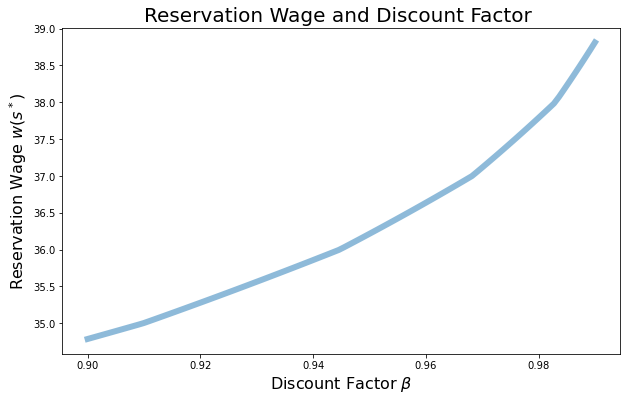

In [7]:
# Q1.2 discount factor results

β_grid = np.linspace(0.9, 0.99, 100)

# reservation wage
rw = plot_reservation_wage(β_grid, 'beta', 'Discount Factor $\\beta$')


As $\beta$ increases, agent's reservation wage increases.

Higher $\beta$ means future payments are more valuable. For infinitely living agent, the opportunity cost of passing up current wage decreases and waiting for a better wage becomes more attractive.

---

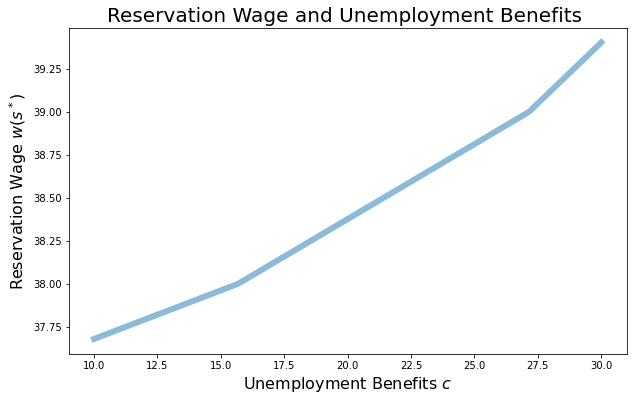

In [8]:
# Q1.2 unemployment benefit results

c_grid = np.linspace(10, 30, 100)
rw =  plot_reservation_wage(c_grid, 'c', 'Unemployment Benefits $c$')

As $c$ increases, agent's reservation wage increases.

If the agent's unemployment benefit $c$ increases, they are disincentivized to accept the same wage before the benefit increase, and will want to accept wage only if compensated more.

---

## Q2 McCall Model with Desperate Unemployed Job Seekers

*Try first thyself, and after call in God; For to the worker God himself lends aid.  -- Euripedes, "Hippolytus"*

Assume there are three types of agents in this economy: the Employed (E), the Unemployed (U), and the Desperate (D).

- Time period is discrete, and the economic agents live forever. The discount factor $\beta$ is common across all the agents.
- A Desperate (D) agent will receive an unemployment benefit $c$ every period. She might regain some courage to enter the job market: Type (D) will become the Unemployed (U) with a probability $\alpha$, and will remain Desperate (D) with probability $1-\alpha$.
- An Unemployed (U) agent receives in each period a job offer at wage $w(s)$ depend on the underlying state $s$. Assume there are $n$ states. $s$ is i.i.d. over time, with $q(s)$ being the probability mass function over the states:
    - This Unemployed (U) agent can choose to accept the offer she receives, or to reject the offer.
    - If she accepts the offer, she becomes Employed (E) and receive the same wage forever, starting from the current period.
    - If she rejects the offer, she will receive an unemployment benefit $c$ for the current period, and will become Desperate (D) next with a probability $\gamma$ or remain Unemployed (U) with a probability $1 - \gamma$.

### Q2.1 Bellman Equation

Write down the Bellman equation for the Desperate (D) and the Unemployed (U) agents. The value functions are denoted as $V^{D}$ and $V^{U}$ respectively.

---
#### Bellman Equations for Q2.1:

$$
\DeclareMathOperator{\E}{\mathbb{E}}
\begin{align}
    V^D\left(s\right) &=
        c + \beta \,
        \E_s\left[
            \alpha V^U\left(s'\right) +
            \left(1 - \alpha\right) V^D\left(s'\right)
        \right]
    \\
    &= c +\beta \sum_{s'\in\mathbb{S}} q\left(s'\right)
            \left(
                \alpha V^U\left(s'\right) +
                \left(1-\alpha\right)V^D\left(s'\right)
            \right)
    \\
    \\
    V^U\left(s\right) &=
        \max\left\{
            \frac{w\left(s\right)}{1-\beta},
            c + \beta \,
            \E_s \left[
                \gamma V^D \left( s' \right)
                + \left(1 - \gamma\right)V^U\left(s'\right)
            \right]
        \right\}
    \\
    &= \max\left\{
            \frac{w\left(s\right)}{1-\beta},
            c +\beta \sum_{s'\in\mathbb{S}} q\left(s'\right)
            \left(
                \gamma V^D\left(s'\right) +
                \left(1-\gamma\right)V^U\left(s'\right)
            \right)
        \right\}
\end{align}
$$

### Q2.2 Solve the Model

We use the same parameterization as Q1, with additional assumptions: $\alpha = 0.1$ and $\gamma = 0.3$.

Solve the value functions $V^D$ and $V^U$. (hint: notice that the value of Desperate type is the same across all the states. However, the value of Unemployed type varies across the states.) Describe what you find, and try to explain the economic intuition behind.

In [9]:
# Preparations and parameterization
n, a, b = 51, 200, 100                        # default parameters
q_default = stats.betabinom(n, a, b).pmf      # probability mass function

w_min, w_max = 10, 60
w_default = np.linspace(w_min, w_max, n)
q_grid = q_default(w_default)

c = 25       # Unemployment benefit
beta = 0.99  # Discount factor
alpha = 0.1  # Transition probability from D to U
gamma = 0.3  # Transition probability from U to D

In [10]:
# Q2 setup

def desperate_McCall(
    c = 25,       # Unemployment benefit
    beta = 0.99,  # Discount factor
    alpha = 0.1,  # Transition probability from D to U
    gamma = 0.3,  # Transition probability from U to D
    tau = 0 # Tax rate for wage (Q2.3)

):
    '''
    Solves McCall model with desperate value function.
    
    Returns results when solution converges.
    '''
    
    # initialize value functions as lists of arrays
    # list are easier to append for unknown number of iterations
    v_u = [np.zeros(n)] # V^U(s)
    v_d = [0] # V^D(s)
    
    # perpetuity value (value of accept) after tax
    w = (1-tau) * w_default / (1 - beta)
        
    t = 0 # counter

    # iterate until convergence
    while True:

        # V^U(s) continuation value
        cont = c + beta * np.dot(
            gamma * v_d[-1] + (1 - gamma) * v_u[-1], # weighted average of V^U(s) and V^D(s)
            q_grid
        )

        # V^U(s) policy function
        is_accept = w > cont

        # update desperate value function
        v_d.append(
            c + beta * np.dot(
                alpha * v_u[-1] + (1 - alpha) * v_d[-1], # weighted average of prior V^U(s) and V^D(s)
                q_grid
            )
        )

        # update unemployed value function
        v_u.append(
            w * (is_accept==True) + cont * (is_accept==False)
        )

        
        # update iteration counter
        t += 1
        
        # wait for converge of V^U(s) and V^D(s)
        if all(v_u[-1]==v_u[-2]) and (v_d[-1]==v_d[-2]):
            
            # compute reservation wage
            rw = (1-beta) * cont / (1-tau)
            
            # return results at convergence
            return {
                'V^U(s)' : v_u[-1], # V^U(s) value function
                'V^D(s)' : v_d[-1], # V^D(s) value function
                'V_accept (after-tax perpetuity)' : w, # accept value
                'V_reject (continuation)' : cont, # reject value
                'Policy (accept)' : is_accept, # policy function
                't' : t, # iterations
                'rw' : rw # reservation wage
            }


In [11]:

# setup function for plots and tables
def plot_McCall(show_table=True, **kwargs):
    
    '''
    Plot solution of desperate McCall model.
    '''

    # solve model
    res = desperate_McCall(**kwargs)

    t = res.pop('t')
    rw = res.pop('rw')
    
    # print number of iterations to converge
    print(f'Convergence at {textbf(t)} periods')

    # print reservation wage
    print('Reservation Wage:', textbf(round(rw, 4)))

    plt.figure(figsize=(10, 6))

    # plot unemployed value function
    plt.plot(w_default, res[f'V^U(s)'], label=f'$V^U(s)$', **line_params)

    # plot desperate value function
    plt.plot(w_default,
             res[f'V^D(s)'] * np.ones(n), # extend line
             label=f'$V^D(s)$',
             ls = '--',
             **line_params)

    # labels and legend
    plt.xlabel('Wage $w(s)$', **font_params)
    plt.ylabel('Values $V(s)$', **font_params)
    plt.title(f'Desperate McCall Solution', fontsize=20)
    plt.legend(**font_params)

    plt.show()

    # show convergence results as dataframe
    if show_table:
        
        df = pd.DataFrame(res, index=w_default)
        df.index.name = 'w(s)'

        display(
            df.round(2)
    )

Convergence at 570 periods
Reservation Wage: 36.7564


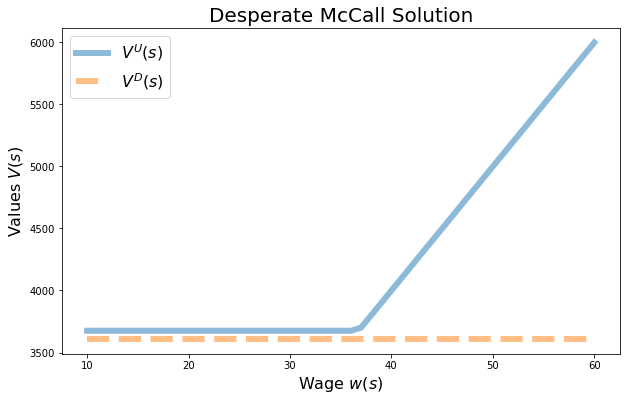

,V^U(s),V^D(s),V_accept (after-tax perpetuity),V_reject (continuation),Policy (accept)
w(s),,,,,
10.0,3675.64,3609.09,1000.0,3675.64,False
11.0,3675.64,3609.09,1100.0,3675.64,False
12.0,3675.64,3609.09,1200.0,3675.64,False
13.0,3675.64,3609.09,1300.0,3675.64,False
14.0,3675.64,3609.09,1400.0,3675.64,False
15.0,3675.64,3609.09,1500.0,3675.64,False
16.0,3675.64,3609.09,1600.0,3675.64,False
17.0,3675.64,3609.09,1700.0,3675.64,False
18.0,3675.64,3609.09,1800.0,3675.64,False


In [12]:

# Q2.2 solution

plot_McCall()

Reservation wage: $36 < w(s^*) < 37$.

With current parameters $c$ and $\alpha$, $V^U(s)$ is higher than $V^D(S)$ at wage $w(s)$, since the agent gets the same unemployment benefit $c$ in both states, but is only able to accept a wage higher than $c$ when unemployed (in state $U$).

---

### Q2.3 Comparative Statics

Now we set $\alpha = 0.5$, i.e., the Desperate type regains her confidence more easily. Solve the model. How do the solutions differ from Q2.2? How do the value function and the reservation wage change?

Convergence at 402 periods
Reservation Wage: 38.1281


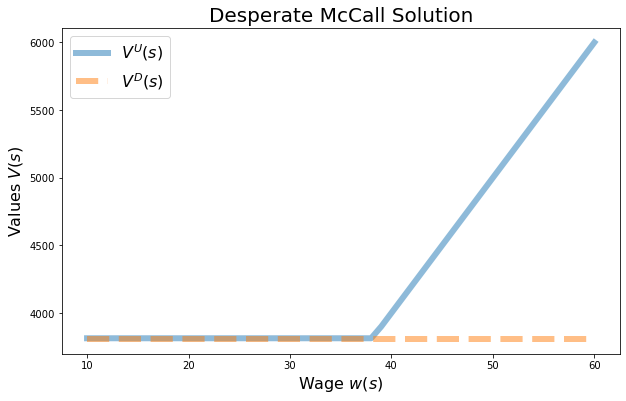

,V^U(s),V^D(s),V_accept (after-tax perpetuity),V_reject (continuation),Policy (accept)
w(s),,,,,
10.0,3812.81,3807.58,1000.0,3812.81,False
11.0,3812.81,3807.58,1100.0,3812.81,False
12.0,3812.81,3807.58,1200.0,3812.81,False
13.0,3812.81,3807.58,1300.0,3812.81,False
14.0,3812.81,3807.58,1400.0,3812.81,False
15.0,3812.81,3807.58,1500.0,3812.81,False
16.0,3812.81,3807.58,1600.0,3812.81,False
17.0,3812.81,3807.58,1700.0,3812.81,False
18.0,3812.81,3807.58,1800.0,3812.81,False


In [13]:
# Q2.3 solution

plot_McCall(alpha=0.5)

Reservation wage: $38 < w(s^*) < 39$. Reservation wage increased by $\approx 2$ when transition probability from desperate to uemployed changed from $\alpha = 0.1$ to $\alpha = 0.5$.

$V^U(s)$ is still higher than $V^D(S)$ for all wage offers. However, the value gap is smaller because the agent is now more likely to improve to unemployed status $U$.

As as $\alpha$ increases, $V^D(s)$ increases. When $\alpha=1$, $V^D(s)$ is about the same as the value of accepting the reservation wage $V^U(s^*)$.


For states with non-accepting wages $s < s^*$, $V^U(S)$ also increases, because if the agent transitions from unemployed $U$ to desperate $D$ status, they have a higher probability of returning to $U$ again.

---

### Q2.4 (Bonus, 5 pts) Canada Emergency Response Benefit

Due to COVID-19, a lot of firms/establishments freeze their hiring quota, hence making the unemployed guys easier to become more desperate. The Canadian government then (equivalently) increases the unemployment benefit (i.e., CERB) during this period. However, that means Canada faces a higher deficit in the future, and the Canadian government have to increase the taxes somehow to finance it.

Suppose now $\alpha = 0.1, \gamma = 0.6, c = 30$. And there's a income tax rate $\tau = 0.3$ on the wages. That is to say the employed workers can only receive $(1-\tau)*w$ forever for some job offer with wage $w$.

1. Solve the value function
2. How does the reservation wage change? What does that imply?
3. Why CERB might/might not be a good policy?

Convergence at 2736 periods
Reservation Wage: 42.9194


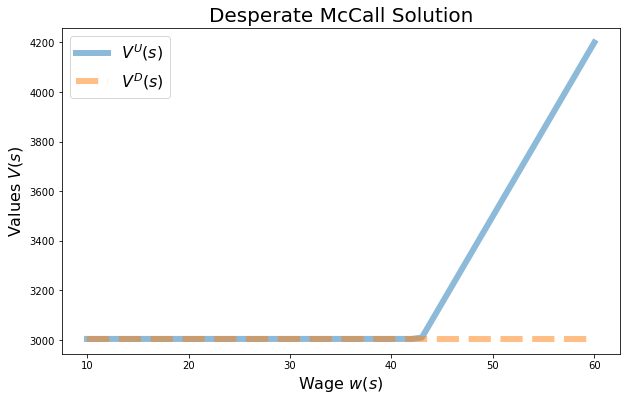

,V^U(s),V^D(s),V_accept (after-tax perpetuity),V_reject (continuation),Policy (accept)
w(s),,,,,
10.0,3004.36,3004.23,700.0,3004.36,False
11.0,3004.36,3004.23,770.0,3004.36,False
12.0,3004.36,3004.23,840.0,3004.36,False
13.0,3004.36,3004.23,910.0,3004.36,False
14.0,3004.36,3004.23,980.0,3004.36,False
15.0,3004.36,3004.23,1050.0,3004.36,False
16.0,3004.36,3004.23,1120.0,3004.36,False
17.0,3004.36,3004.23,1190.0,3004.36,False
18.0,3004.36,3004.23,1260.0,3004.36,False


In [14]:
# 1. solve model
plot_McCall(
    alpha=0.1,
    gamma=0.6,
    c=30,
    tau=0.3
)


2. Reservation wage becomes higher: $42 < w(s^*)< 43$, which implies unemployment will actually increase because unemployed agents are more likely to hold out for higher wage.

    Lower $\alpha$ and higher $\gamma$ means the agent is more likely to be "trapped" in the unemployed/desperate cycle, since the agent is more likely transition from $U$ to $D$ but not from $D$ to $U$. The agent can only become employed once in $U$, so this should have an effect of decreasing reservation wage since $V^U(s)$ should decrease.

    An increasing tax rate $\tau$ decreases value when employed, since agent will lose part of their wages to tax. It will have an effect of increasing the reservation wage as agents will require compensation for the tax expense from their accepted wage.

    An increasing unemployment benefit $c$ increases the reservation wage also as discussed before, since the agent will want higher wages to compensate for the higher opportunity cost of forgoing unemployment benefit if they accept a wage.



3. This policy will not help from an unemployment standpoint, since reservation wages will increase for agents, but distribution of wages will not increase, meaning unemployed agents will be more less likely to accept job offers.